# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends
1.Collecting weather data from 559 random and diverse cities around the world using the OpenWeatherMap API,the data illustrated maximum temperature(in Fahrenheit),humidity(%),cloudiness(%)and wind speed(in mph)with the corresponding city,and with respect to the geo-coordinate,Latitude.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os

!pip install citipy

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# create url
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 45.01,
        "lat": 10.44
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 82.02,
        "feels_like": 84.97,
        "temp_min": 82.02,
        "temp_max": 82.02,
        "pressure": 1016,
        "humidity": 53,
        "sea_level": 1016,
        "grnd_level": 1016
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.77,
        "deg": 33
    },
    "clouds": {
        "all": 3
    },
    "dt": 1604730424,
    "sys": {
        "country": "SO",
        "sunrise": 1604717554,
        "sunset": 1604759687
    },
    "timezone": 10800,
    "id": 64435,
    "name": "Berbera",
    "cod": 200
}


In [11]:
print(requests.get(query_url + city))

<Response [200]>


In [12]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mataura
Processing Record 2 | Cidreira
Processing Record 3 | Ancud
Processing Record 4 | Bengkulu
Processing Record 5 | Norman Wells
Processing Record 6 | Hilo
Processing Record 7 | Vaini
Processing Record 8 | Puerto Ayora
Processing Record 9 | Kendari
Processing Record 10 | Ushuaia
Processing Record 11 | Vila do Maio
City not found. Skipping...
Processing Record 12 | Lavrentiya
Processing Record 13 | San Felipe
Processing Record 14 | Busselton
Processing Record 15 | Cape Town
Processing Record 16 | Saint-Philippe
Processing Record 17 | Albany
Processing Record 18 | Ko Samui
Processing Record 19 | Punta Arenas
City not found. Skipping...
Processing Record 20 | Ubatuba
Processing Record 21 | Upernavik
Processing Record 22 | Ngunguru
Processing Record 23 | Airai
Processing Record 24 | Rikitea
Processing Record 25 | Hervey Bay
Processing Record 26 | Avarua
Processing Record 27 | Dajal
Processing Record 28 | Kap

City not found. Skipping...
Processing Record 224 | Port Augusta
Processing Record 225 | Cantagalo
Processing Record 226 | Mitsamiouli
Processing Record 227 | Yumen
Processing Record 228 | Galesong
Processing Record 229 | Kuloy
Processing Record 230 | Bariloche
Processing Record 231 | Alice Springs
Processing Record 232 | Arrecife
Processing Record 233 | Huicungo
Processing Record 234 | Cabo San Lucas
Processing Record 235 | Salalah
Processing Record 236 | Tegul'det
Processing Record 237 | Hay River
Processing Record 238 | Castro
Processing Record 239 | Los Llanos de Aridane
Processing Record 240 | Bozhou
Processing Record 241 | Olafsvik
Processing Record 242 | Abaeté
Processing Record 243 | Tura
Processing Record 244 | Port Hedland
Processing Record 245 | Inta
Processing Record 246 | Broken Hill
Processing Record 247 | Soyo
Processing Record 248 | Sidi Ali
Processing Record 249 | Ostrovnoy
Processing Record 250 | Balkanabat
Processing Record 251 | Kristinehamn
Processing Record 252 | 

Processing Record 456 | Lokosovo
Processing Record 457 | Anloga
Processing Record 458 | Prince George
Processing Record 459 | Merritt
Processing Record 460 | Quatre Cocos
Processing Record 461 | Takoradze
Processing Record 462 | Yerbogachën
Processing Record 463 | Nouadhibou
Processing Record 464 | Walvis Bay
Processing Record 465 | Samarai
Processing Record 466 | Tautira
City not found. Skipping...
Processing Record 467 | Trujillo
Processing Record 468 | Puerto Parra
Processing Record 469 | Changji
Processing Record 470 | Oranjemund
Processing Record 471 | Gaoyou
Processing Record 472 | Najrān
Processing Record 473 | Çeşme
Processing Record 474 | Wattegama
Processing Record 475 | Green Valley
Processing Record 476 | Clarence Town
Processing Record 477 | Mucurapo
Processing Record 478 | North Battleford
Processing Record 479 | Chipata
Processing Record 480 | Nuuk
Processing Record 481 | Mil'kovo
Processing Record 482 | Novorudnyy
Processing Record 483 | Fortuna
Processing Record 484 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               597
Country            597
Date               597
Latitude           597
Longitude          597
Max Temperature    597
Humidity           597
Cloudiness         597
Wind Speed         597
dtype: int64

In [14]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,1604730433,-46.19,168.86,44.11,96,100,3.89
1,Cidreira,BR,1604730433,-30.18,-50.21,66.72,85,1,15.32
2,Ancud,CL,1604730433,-41.87,-73.82,46.00,80,98,5.82
3,Bengkulu,ID,1604730434,-3.80,102.27,83.79,75,25,8.10
4,Norman Wells,CA,1604730202,65.28,-126.83,10.40,92,90,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

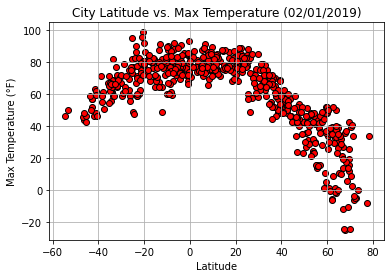

In [15]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()


#### Latitude vs. Humidity Plot

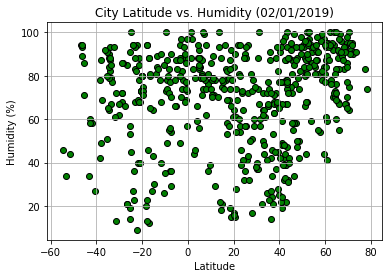

In [20]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

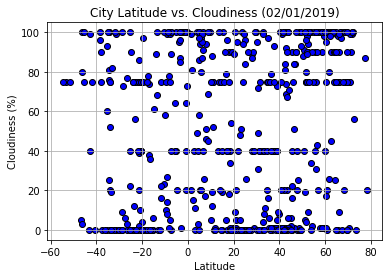

In [22]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

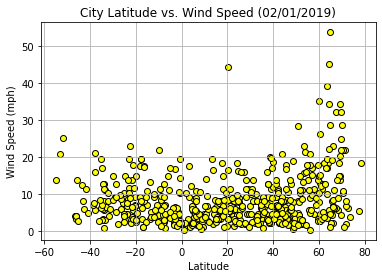

In [24]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()